**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [14]:
import pandas as pd

In [175]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [17]:
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']


### Check no.of records and features given in each dataset
hint - check shape

In [18]:
books.shape

(271360, 8)

In [19]:
users.shape

(278858, 3)

In [20]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [21]:
books.head(4)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [22]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

### Drop last three columns containing image URLs which will not be required for analysis

In [23]:
books=books.drop(["imageUrlS"],axis=1)

In [24]:
books=books.drop("imageUrlM",axis=1)

In [25]:
books=books.drop("imageUrlL",axis=1)

In [26]:
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,0671876864,1
bookTitle,271360,242135,Selected Poems,27
bookAuthor,271359,102023,Agatha Christie,632
yearOfPublication,271360,202,2002,13903
publisher,271358,16807,Harlequin,7535


In [27]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


**yearOfPublication**

### Check unique values of yearOfPublication


In [28]:
books.groupby("yearOfPublication").count().head()

,ISBN,bookTitle,bookAuthor,publisher
yearOfPublication,,,,
0,3570,3570,3570,3570
1806,1,1,1,1
1900,1,1,1,1
1901,7,7,7,7
1902,2,2,2,2


In [29]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [30]:
import numpy as np

In [31]:
books.loc[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [32]:
books.loc[books['yearOfPublication'] == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [34]:
ind1=(books.loc[books['yearOfPublication'] == 'DK Publishing Inc']).index

In [35]:
ind2=(books.loc[books['yearOfPublication'] == 'Gallimard']).index

In [36]:
books.drop(ind1,inplace=True)

In [37]:
books.drop(ind2,inplace=True)

In [38]:
print(ind1,"\n",ind2)

Int64Index([209538, 221678], dtype='int64') 
 Int64Index([220731], dtype='int64')


In [39]:
print(books.yearOfPublication.unique(),end='')

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

### Change the datatype of yearOfPublication to 'int'

In [40]:
books["yearOfPublication"]=books['yearOfPublication'].astype(int)

In [41]:
books["yearOfPublication"].dtype

dtype('int32')

### Drop NaNs in `'publisher'` column


In [42]:
books["publisher"]=books["publisher"].dropna()

In [43]:
books.shape

(271357, 5)

## Exploring Users dataset

In [44]:
users.shape

(278858, 3)

In [45]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [46]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
userID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


In [47]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [48]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

### Get all unique values in ascending order for column `Age`

In [49]:
print(sorted(users["Age"].unique()),end='')

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [50]:
users['Age'].loc[users['Age']>90]=np.nan

C:\Users\darsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
print(sorted(users['Age'].unique()),end='')

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]

In [52]:
users['Age'].loc[users['Age']<5]=np.nan

In [53]:
print(sorted(users['Age'].unique()),end='')

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]

In [54]:
users.shape

(278858, 3)

### Replace null values in column `Age` with mean

In [55]:
users['Age']=users["Age"].replace(np.nan,users['Age'].mean())

In [56]:
users['Age'].mean()

34.72384041631816

In [57]:
print(users.isna(),end='')

        userID  Location    Age
0        False     False  False
1        False     False  False
2        False     False  False
3        False     False  False
4        False     False  False
5        False     False  False
6        False     False  False
7        False     False  False
8        False     False  False
9        False     False  False
10       False     False  False
11       False     False  False
12       False     False  False
13       False     False  False
14       False     False  False
15       False     False  False
16       False     False  False
17       False     False  False
18       False     False  False
19       False     False  False
20       False     False  False
21       False     False  False
22       False     False  False
23       False     False  False
24       False     False  False
25       False     False  False
26       False     False  False
27       False     False  False
28       False     False  False
29       False     False  False
...     

### Change the datatype of `Age` to `int`

In [58]:
users['Age']=users['Age'].astype(int)

In [59]:
users['Age'].dtype

dtype('int32')

In [60]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [61]:
ratings.shape

(1149780, 3)

In [62]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [63]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [64]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
bookRating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [68]:
df=ratings.merge(books)

In [69]:
df.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'bookAuthor',
       'yearOfPublication', 'publisher'],
      dtype='object')

In [70]:
ratings=df.drop(['bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'],axis=1)

In [71]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [72]:
ratings.shape

(1031132, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [73]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [74]:
users.shape

(278858, 3)

In [75]:
df1=ratings.merge(users)

In [76]:
df1.columns

Index(['userID', 'ISBN', 'bookRating', 'Location', 'Age'], dtype='object')

In [77]:
ratings=df1.drop(['Location', 'Age'],axis=1)

In [78]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [79]:
ratings.shape

(1031132, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [80]:
sorted(ratings['bookRating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [81]:
ind=(ratings.loc[ratings['bookRating'] == 0]).index   # storing index values whoes rating is zero

In [82]:
print(ind,end='')

Int64Index([      0,       9,      12,      16,      21,      24,      25,
                 29,      31,      37,
            ...
            1031109, 1031111, 1031113, 1031114, 1031115, 1031116, 1031117,
            1031118, 1031123, 1031129],
           dtype='int64', length=647291)

In [83]:
rating=ratings.drop(ind)  # removing rows which have bookRating value is zero

In [84]:
rating.shape

(383841, 3)

### Find out which rating has been given highest number of times

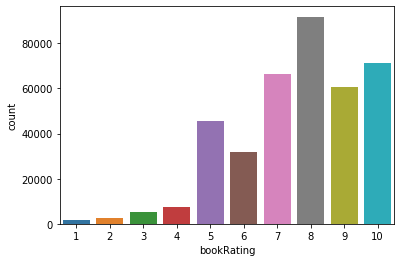

In [177]:
import seaborn as sns
chart=sns.countplot(x='bookRating',data=rating)

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [85]:
users.columns


Index(['userID', 'Location', 'Age'], dtype='object')

In [86]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

In [87]:
rating.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [88]:
user_cnt=rating.groupby('userID').count()   # counting no of books rating per unique user and storing in variable user_cnt

In [89]:
user_cnt.columns

Index(['ISBN', 'bookRating'], dtype='object')

In [90]:
user_cnt.head()

,ISBN,bookRating
userID,,
8,7,7
9,1,1
12,1,1
14,3,3
16,1,1


In [91]:
user=user_cnt.loc[user_cnt["bookRating"]<100]  # selecting the rows whose bookRatings is less than 100

In [92]:
user.head()

,ISBN,bookRating
userID,,
8,7,7
9,1,1
12,1,1
14,3,3
16,1,1


In [93]:
user.index   # getting index of all users whose book ratings are less than 100

Int64Index([     8,      9,     12,     14,     16,     17,     19,     22,
                26,     32,
            ...
            278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', name='userID', length=67642)

In [94]:
users.shape

(278858, 3)

In [95]:
users=users.drop(user.index)    # droping all users who gave rating less than 100 books

In [96]:
users.shape

(211216, 3)

In [97]:
278858-67642

211216

In [136]:
rating.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [132]:
rating['bookRating']=rating['rating_scale']

In [134]:
rating['bookRating'].head(3)

1    5
2    9
3    8
Name: bookRating, dtype: int64

In [135]:
rating=rating.drop('rating_scale',axis=1)

In [110]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import accuracy
from surprise.model_selection import train_test_split


reader = Reader(rating_scale=(1, 10))

In [130]:
data = Dataset.load_from_df(df_new[['userID', 'ISBN', 'bookRating']], reader)


In [138]:
data = Dataset.load_from_df(rating[['userID', 'ISBN', 'bookRating']], reader)

### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [139]:
trainset,testset=train_test_split(data,test_size=0.15)

### Explore trainset and testset

In [143]:
trainset

In [3]:
from surprise import SVD
from surprise import accuracy

In [153]:
algo=SVD()

In [154]:
algo.fit(trainset)

In [157]:
predictions

[Prediction(uid=105076, iid='0345464958', r_ui=8.0, est=6.8496249521613555, details={'was_impossible': False}),
 Prediction(uid=109410, iid='2290300020', r_ui=8.0, est=7.586471834355053, details={'was_impossible': False}),
 Prediction(uid=171584, iid='2070400603', r_ui=6.0, est=7.548462009626477, details={'was_impossible': False}),
 Prediction(uid=185634, iid='0671693816', r_ui=6.0, est=6.701414093329331, details={'was_impossible': False}),
 Prediction(uid=35859, iid='0380803755', r_ui=7.0, est=7.59733971530543, details={'was_impossible': False}),
 Prediction(uid=60625, iid='0767907817', r_ui=7.0, est=7.73700494217937, details={'was_impossible': False}),
 Prediction(uid=205999, iid='0753806738', r_ui=10.0, est=8.139143746454366, details={'was_impossible': False}),
 Prediction(uid=167863, iid='0425105334', r_ui=9.0, est=8.337728371510611, details={'was_impossible': False}),
 Prediction(uid=109940, iid='0440971721', r_ui=5.0, est=7.39414003762224, details={'was_impossible': False}),
 Pre

### Predict ratings for testset and check RMSE

In [158]:
predictions=algo.test(testset)

In [160]:
 results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

In [162]:
results


{'test_rmse': array([1.63950284, 1.64385415, 1.64293043]),
 'fit_time': (37.6287305355072, 37.402525424957275, 37.40204095840454),
 'test_time': (5.37592339515686, 2.6691439151763916, 2.433363437652588)}

### Generating top n recommendations for a user

In [170]:
from collections import defaultdict

In [171]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [172]:
top_n = get_top_n(predictions, n=10)

In [173]:
top_n

defaultdict(list,
            {105076: [('0345464958', 6.8496249521613555)],
             109410: [('2290300020', 7.586471834355053)],
             171584: [('2070419657', 7.6564694190000155),
              ('2070400603', 7.548462009626477)],
             185634: [('0553577808', 8.066128479528023),
              ('0446517399', 7.979592731637579),
              ('0373709307', 7.863193894469474),
              ('0671683454', 7.78146099947589),
              ('0913590088', 7.78146099947589),
              ('0061096113', 7.6834763328744184),
              ('1555217834', 7.584624086868075),
              ('0671693816', 6.701414093329331)],
             35859: [('044021145X', 9.08384437332463),
              ('0345419642', 8.953191250795026),
              ('0312951426', 8.76439354856407),
              ('0394800206', 8.622679465710055),
              ('0307001504', 8.578462134232208),
              ('0743418174', 8.561640185590687),
              ('0717283534', 8.489456124260906),
         

In [174]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

105076 ['0345464958']
109410 ['2290300020']
171584 ['2070419657', '2070400603']
185634 ['0553577808', '0446517399', '0373709307', '0671683454', '0913590088', '0061096113', '1555217834', '0671693816']
35859 ['044021145X', '0345419642', '0312951426', '0394800206', '0307001504', '0743418174', '0717283534', '009925672X', '0385317093', '0393314804']
60625 ['0767907817']
205999 ['0140276300', '0753806738']
167863 ['0425105334']
109940 ['0440971721']
274629 ['0373707614']
275732 ['0345308980', '0812516230', '0345335287']
225199 ['0553258648', '0553563505', '0394726251', '0312875460', '0684847477', '014044310X', '0743437780', '0140446273', '014009735X', '0140442596']
225232 ['0413486109', '0553240633', '0140013113', '0140019421', '0752837710', '1863735313', '0670855618', '0140112936', '1857022440', '0415154197']
105214 ['0375703764', '0671789422', '0679879242', '0440487617', '0871136104', '0375412824', '0446391301', '0684853515', '0786864214', '0316899984']
125928 ['0804106304', '0553260111', 